# Conditional Flow-Matching
We learn the galaxy phase space densities from gaia data

In [3]:
from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.register_config_mnist import MNIST_UNet_CondFlowMatch as Config

config = Config(NAME = 'noise_to_mnist',
                DATA_SOURCE = 'fashion',
                DATA_TARGET = 'mnist',
                DATA_SPLIT_FRACS = [1.0, 0.0, 0.0],
                BATCH_SIZE = 128,
                EPOCHS = 3,
                LR = 1e-4,
                DIM_HIDDEN = 32, 
                DYNAMICS = 'OptimalTransportFlowMatching',
                SIGMA = 0.0,
                SOLVER ='dopri5',
                ATOL = 1e-4,
                RTOL = 1e-4,
                NUM_SAMPLING_STEPS = 100)

#...set working directory for results:

config.set_workdir(path='../../results', save_config=True)

#========================================================================================================
INFO: created directory: ../../results/noise_to_mnist.OptimalTransportFlowMatching.Unet.2024.02.10_22h26
#========================================================================================================
+---------------------+------------------------------+
| Parameters          | Values                       |
+---------------------+------------------------------+
| NAME                | noise_to_mnist               |
| DATA_SOURCE         | noise                        |
| DATA_TARGET         | mnist                        |
| DIM_INPUT           | 784                          |
| INPUT_SHAPE         | (1, 28, 28)                  |
| DEVICE              | cpu                          |
| OPTIMIZER           | Adam                         |
| LR                  | 0.0001                       |
| WEIGHT_DECAY        | 0.0                          |
| OPTIMIZER_BETAS     |

In [4]:
from DynGenModels.datamodules.mnist.datasets import MNISTDataset 
mnist = MNISTDataset(config)

In [5]:
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching
from DynGenModels.datamodules.mnist.dataloader import MNISTDataloader
from DynGenModels.models.unet import Unet

cfm = DynGenModelTrainer(dynamics = OptimalTransportFlowMatching(config), 
                         model = Unet(config),
                         dataloader = MNISTDataloader(mnist, config), 
                         config = config)

cfm.train()

number of training parameters: 1075361
start training...


INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 60000, validation size: 0, testing sizes: 0


epochs:   0%|          | 0/3 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([1

/home/df630/DynGenModels/src/DynGenModels/trainer/trainer.py:124: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


### generate data from trained model:

In [6]:
import torch
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, 
                             num_sampling_steps=100,
                             configs=config)
sample = pipeline.generate_samples(input_source=torch.randn(100, 1, 28, 28))

INFO: neural ODE solver with dopri5 method and steps=100


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size([100, 28, 1])
torch.Size([100, 1])
torch.Size([100, 1, 28, 1])
torch.Size

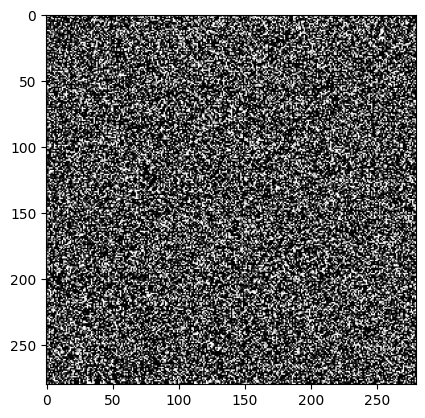

In [29]:
from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage
from torchvision.utils import make_grid
from matplotlib import pyplot as plt


grid = make_grid(
    pipeline.trajectories[0, :100].view([-1, 1, 28, 28]).clip(0, 1), value_range=(0, 1), padding=0, nrow=10
)
img = ToPILImage()(grid)
plt.imshow(img)

In [28]:
x = pipeline.trajectories[0][99]
img = ToPILImage()(x)
img

In [1]:
from DynGenModels.datamodules.mnist.configs import MNIST_Configs
from DynGenModels.models.architectures.configs import UNetLight_Configs
from DynGenModels.dynamics.cnf.configs import CondFlowMatch_Configs
from DynGenModels.pipelines.configs import NeuralODE_Sampler_Configs
from DynGenModels.configs.utils import Load_Experiment_Config

Config = Load_Experiment_Config(data = MNIST_Configs,
                                model = UNetLight_Configs, 
                                dynamics = CondFlowMatch_Configs, 
                                pipeline = NeuralODE_Sampler_Configs)

config = Config(NAME = 'noise_to_mnist',
                DATA_SOURCE = 'fashion',
                DATA_TARGET = 'mnist',
                DATA_SPLIT_FRACS = [1.0, 0.0, 0.0],
                BATCH_SIZE = 128,
                EPOCHS = 3,
                LR = 1e-4,
                MODEL = 'UNetLight',
                DIM_HIDDEN = 32, 
                DIM_TIME_EMB = 32,
                ACTIVATION = 'GELU',
                DYNAMICS = 'OptimalTransportFlowMatching',
                SIGMA = 0.0,
                SOLVER ='dopri5',
                ATOL = 1e-4,
                RTOL = 1e-4,
                NUM_SAMPLING_STEPS = 100)

#...set working directory for results:

config.set_workdir(path='../../results', save_config=True)

#=============================================================================================================
INFO: created directory: ../../results/noise_to_mnist.OptimalTransportFlowMatching.UNetLight.2024.02.11_13h32
#=============================================================================================================
+---------------------+------------------------------+
| Parameters          | Values                       |
+---------------------+------------------------------+
| NAME                | noise_to_mnist               |
| DATA_SOURCE         | fashion                      |
| DATA_TARGET         | mnist                        |
| DIM_INPUT           | 784                          |
| INPUT_SHAPE         | (1, 28, 28)                  |
| DEVICE              | cpu                          |
| OPTIMIZER           | Adam                         |
| LR                  | 0.0001                       |
| WEIGHT_DECAY        | 0.0                          |
| OPTIMI

In [5]:

from DynGenModels.datamodules.mnist.datasets import MNISTDataset


In [6]:
from DynGenModels.datamodules.mnist.datasets import MNISTDataset
from DynGenModels.datamodules.mnist.dataloader import MNISTDataloader
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching
from DynGenModels.models.dynamical_model import Model
from DynGenModels.models.architectures.unet import UNetLight

mnist = MNISTDataset(config)

cfm = Model(dynamics = OptimalTransportFlowMatching(config),
            model = UNetLight(config),
            dataloader = MNISTDataloader(mnist, config), 
            config = config)

INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 60000, validation size: 0, testing sizes: 0


In [7]:
cfm.train()

number of training parameters: 408257
start training...


epochs:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
import torch
from torchvision.transforms import ToPILImage
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, 
                             num_sampling_steps=100,
                             configs=config)

sample = pipeline.generate_samples(input_source=torch.randn(100, 1, 28, 28))


INFO: neural ODE solver with dopri5 method and steps=100


  0%|          | 0/1 [00:00<?, ?it/s]

RuntimeError: The size of tensor a (100) must match the size of tensor b (2800) at non-singleton dimension 0

In [ ]:
grid = make_grid( pipeline.trajectories[0, :100].view([-1, 1, 28, 28]).clip(0, 1), value_range=(0, 1), padding=0, nrow=10)
img = ToPILImage()(grid)
plt.imshow(img)